
# Homework 5: Bootstrapping, Hypothesis Testing, and Regression
***

**Name**: **Chandler de Spirlet**

***

This assignment is due on Moodle by **11:59 PM on Friday 17 April**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 


In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

---

### [20 points] Problem 1 - Hypothesis Testing: Knowledge Check

You are working as a Data Scientist for an internet company. Your co-worker, Bob Dob, is a lovable scamp! Unfortunately, he also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's customers. In each case, clearly explain why Bob's hypothesis testing setup or conclusion is incorrect.

**Part A**: Bob has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought something.  

Let $X$ be the random variable describing the number of website visitors who bought something in the previous month, and suppose that the population proportion of visitors who bought something is $p$. Bob is particularly interested to see if the data suggests that more than 20% of website visitors actually buy something.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.20$, where $\hat{p}$ is the sample proportion.

This is saying that, with $H_0 : \hat{p} = 0.20$, 20% of the sample proportion buys something. He wants to instead look at the $p$ value, for this will show the population proportion that buys something.

**Part B**: Bob decides instead to do his hypothesis test with a null hypothesis of $H_0: p > 0.2$.

With Bob using $H_0 : p \gt 0.2$, he needs to have $H_0 : p = 0.20$ because the null-hypothesis always has the equals sign.

**Part C**: Finally on track with reasonable hypotheses of $H_0: p = 0.20$ and $H_1: p > 0.20$, Bob computes a normalized test-statistic of $z = -1.5$ for the sample proportion and concludes that since $-1.5 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ (95%) significance level that the proportion of customers who buy something is less than 15%.

Bob should have said that because the z normalized test-statistic is less than the z critical value at $\alpha$ = 0.05, he rejects the null-hypothesis.

**Part D**: Bob is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$. He computes a p-value of $0.06$, and thus concludes that there is only a 6% probability that the null hypothesis is true. 

Bob meant to say that with a p-value of 0.06, there is a 6% probability of a type 1 error. This means that there is a 6% probability of rejecting a null hypothesis when it is actually correct. In context, this means that there is a 6% probability that Bob could have said that the percentage of pepole who buy something is not 20%, when in reality, it is.

---


### [30 points] Problem 2 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 95% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Do all computations in Python by hand, and report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

t CI: $[\bar{x} - z_{\frac{\alpha}{2}} \times \frac{s}{\sqrt{n}}, \bar{x} + z_{\frac{\alpha}{2}} \times \frac{s}{\sqrt{n}}]$
1. t-confidence interval for Coffee+Nap = 
$$[451.3 - 2.262157(\frac{31.9}{\sqrt{10}}), 451.3 + 2.262157(\frac{31.9}{\sqrt{10}})]$$
$$ = [428.480115, 474.119885]$$
t-confidence interval for Coffee = 
$$[494.2 - 2.262157(\frac{39.6}{\sqrt{10}}), 494.2 + 2.262157(\frac{39.6}{\sqrt{10}})]$$
$$ = [465.871867, 522.528133]$$
t-confidence interval for Nap = 
$$[492.8 - 2.262157(\frac{45.2}{\sqrt{10}}), 492.8 + 2.262157(\frac{45.2}{\sqrt{10}})]$$
$$ = [460.465868, 525.134132]$$
At the 95% t-confidence interval, you could conclude that the true mean reaction time, when sampled repeatedly, is in 95% of the intervals. Coffee+Nap has an interval with smaller values, however, there is overlap between all three categories.
 
 
2. We used a t-distribution because we have a small sample size and the data is normal.

In [2]:
print('t-confidence interval = {}'.format(stats.t.ppf(0.975, df=9)))
t_int = stats.t.ppf(0.975, df=9)
coffee_nap = [451.3 - (t_int * (31.9 / (10 ** 0.5))), 451.3 + (t_int * (31.9 / (10 ** 0.5)))]
print('Coffee+Nap = {}'.format(coffee_nap))
coffee = [494.2 - (t_int * (39.6 / (10 ** 0.5))), 494.2 + (t_int * (39.6 / (10 ** 0.5)))]
print('Coffee = {}'.format(coffee))
nap = [492.8 - (t_int * (45.2 / (10 ** 0.5))), 492.8 + (t_int * (45.2 / (10 ** 0.5)))]
print('Nap = {}'.format(nap))

t-confidence interval = 2.2621571627409915
Coffee+Nap = [428.48011470011295, 474.1198852998871]
Coffee = [465.8718665242781, 522.5281334757218]
Nap = [460.46586785094377, 525.1341321490563]


**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Part D**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

<br>

---

### [50 points] Problem 3 - Simple Linear Regression for Science!

[Google Trends](https://trends.google.com/trends/?geo=US) is a free source of data about the interest in particular search terms. In this problem, we'll look at the interest in the search term "Influenza" and discover how interest in "Influenza" is changing over time. Interest is measured relative to the maximum rate of Google searches for that term over the time period (so the maximum is 100). 

**Part A:** Load up the data in `influenza_interest.csv` into a Pandas DataFrame. Create two new columns:

* `Year` should be the year associated with that data point, and
* `Month` should be the month (1-12) associated with that data point.

Then, make a **scatter plot** (using `pyplot.scatter`) of all of the data points, showing how interest in "influenza" has evolved over time. Label the x-axis by year, displaying ticks for Janurary of each year between 2004 and 2021 (so that we can see all of the data and don't cut the year 2020 off at January 2020). You may find the Matplotlib DateFormatter object and the matplotlib dates module useful to correctly plot this data. You may use them if you wish to, but don't need to. They're imported below.

In [3]:
#STARTER CODE DO NOT CHANGE
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

/Users/chandlerdespirlet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/chandlerdespirlet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


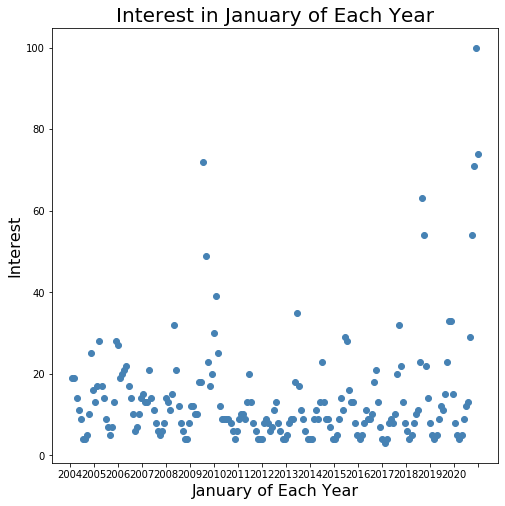

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
df = pd.read_csv('influenza_interest.csv', names=['Month', 'Interest', 'val'])
year_list = []
year_list.append('')
for x in range(1, len(df)):
    val_str = str(df['Month'][x])
    year_val = int(val_str[0:4])
    month_val = int(val_str[5:7])
    df['Month'][x] = month_val
    year_list.append(year_val)
df.insert(1, "Year", year_list, True)
df.drop(df.index[0], inplace=True)

df["Interest"] = pd.to_numeric(df["Interest"])
df['Year'] = pd.to_numeric(df["Year"])
df['Month'] = pd.to_numeric(df['Month'])

for x in range(1, len(df) + 1):
    df['val'][x] = x
axes.scatter(df['val'], df['Interest'], color="steelblue")
axes.set_xlabel('January of Each Year', fontsize=16)
axes.set_ylabel('Interest', fontsize=16)
plt.xticks(np.arange(0, 197, len(df['val']) / 17), (2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020))
axes.set_title('Interest in January of Each Year', fontsize=20)
plt.show()



**Part B:** This data (and the sea-level data from Homework 4) are both **time series**, where the independent variable is *time* and the dependent quantity is interest in influenza (or sea level in the case of HW 4). One of the central assumptions of linear regression is that the data are observations generated by some process, independently of one another. With time series data, we need to be careful because there could be some other process affecting the output data. In particular, **annual cycles** are patterns that reoccur each year and are frequently present in time series data. For example, seasonal patterns of weather are annual cycles.

To see what kind of effect time has, make a **line plot** (using `pyplot.plot`) of the interest in influenza, as a function of time. Again, include all of the data points and, for the x-axis, label only the tick marks associated with January of each year, and be sure to label your axes.

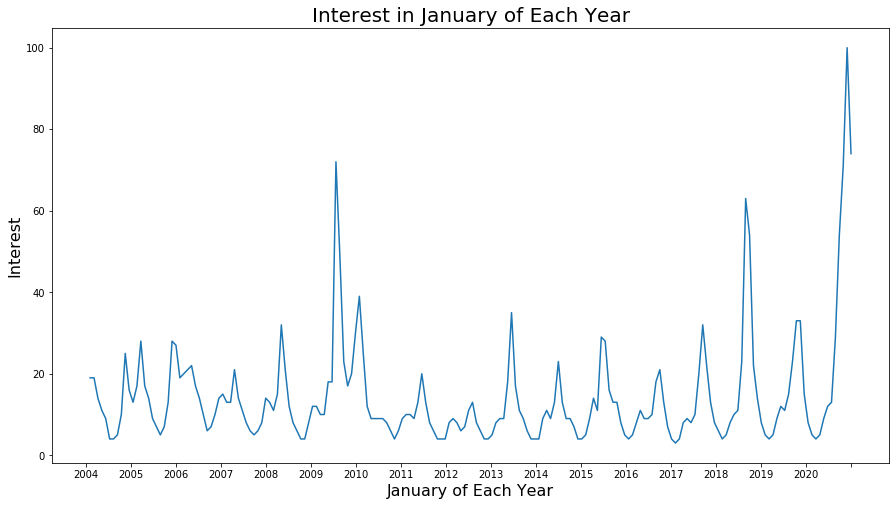

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
axes.set_xlabel('January of Each Year', fontsize=16)
axes.set_ylabel('Interest', fontsize=16)
axes.set_title('Interest in January of Each Year', fontsize=20)
plt.xticks(np.arange(0, 197, len(df['val']) / 17), (2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020))
axes.plot(df['val'], df['Interest'])

**Part C:** Does your plot from Part B suggest that there is some annual cycle to the interest in influenza? During which months is interest in influenza highest? What about lowest? Justify your answers using your plot, **and** by computing the mean interest in influenza for each month. So, compute 12 values and report them in a markdown table. Do **not** just spit out a horizontal list of 12 numbers. That would be yucky to try to read, and we're scientists.

What do you think accounts for the increased interest in influenza during the fall and winter months?

In [6]:
for x in range(1, 13):
    temp = []
    for y in range(1, len(df)):
        if (df['Month'][y] == x):
            temp.append(df['Interest'][y])
    print('The mean for month {} is {}'.format(x, np.mean(temp)))

The mean for month 1 is 22.294117647058822
The mean for month 2 is 25.470588235294116
The mean for month 3 is 21.88235294117647
The mean for month 4 is 15.5
The mean for month 5 is 10.5625
The mean for month 6 is 6.4375
The mean for month 7 is 5.0
The mean for month 8 is 6.0625
The mean for month 9 is 10.25
The mean for month 10 is 14.9375
The mean for month 11 is 12.9375
The mean for month 12 is 14.9375


In the above plots, you can see an early spike indicating that in the early couple of months, there is a surge of interest.

| Month     | Mean Interest      | Significance |
|-----------|--------------------|--------------|
| January   | 22.294117647058822 |              |
| February  | 25.470588235294116 | Highest Mean |
| March     | 21.88235294117647  |              |
| April     | 15.5               |              |
| May       | 10.5625            |              |
| June      | 6.4375             |              |
| July      | 5.0                | Lowest Mean  |
| August    | 6.0625             |              |
| September | 10.25              |              |
| October   | 14.9375            |              |
| November  | 12.9375            |              |
| December  | 14.9375            |              |

Influenza is a seasonal disease, people normally get sick from the flu in the fall and winter. People also tend to stay indoors during the fall and winter months and therefore do not get as much vitamin D from the sun, which is used to help boost one's immune system.

**Part D:** (Spoiler alert!) Since there seems to be an annual cycle, one of the fundamental assumptions of our simple linear regression model is not satisfied. Namely, it is not the case that the model-data residuals, $\epsilon_i$, are independent of one another.

So, we need to process our data a bit further before fitting a regression model. One way to address this is to take the mean of all the data each year and use for analysis the time series of annual mean interest in data science. Write a function (you'll want to use this code again later) that takes in the monthyl DataFrame, and returns a new DataFrame that consists only of two columns:

* `year`, and
* `interest`, the mean interest in data science from all of the months in that year.

Then call this function to convert the monthly data into yearly averages. Print the entire resulting datframe. 

**NOTE:** We have one year with incomplete data in our dataframe. Since 2020 isn't complete yet, we only have 3 months of data for this year. Here, we should compute the average of the three months we have. We'd recommend using a pandas [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) on the year column to compute averages, but how you do this is up to you. If you do use a group by, you may find the .reset_index dataframe function useful to clean up the output. Don't hardcode the years, or do anything that relies on a year being twelve months. It will make your life harder later in this problem.

In [7]:
def process_data(df):
    dfTemp = df.groupby(['Year']).mean().reset_index()
    dfTemp.drop(columns=['Month', 'val'], inplace=True)
    return dfTemp
dfNew = process_data(df)
dfNew

,Year,Interest
0,2004,12.416667
1,2005,15.916667
2,2006,14.083333
3,2007,10.833333
4,2008,12.000000
5,2009,27.750000
6,2010,8.166667
7,2011,8.583333
8,2012,8.500000
9,2013,11.000000


**Part E:** Write a function to fit a a simple linear regression model with `year` as the feature and `interest` as the response (mean annual interest in influenza). You'll need to use this function later. This function should take in a dataframe and return a fitted model. Use the "statsmodels" package (imported below as "sm") to generate the model using their convenient [Ordinary Least Squares model](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html). Here, you'll want to add a constant term to the feature, so that the statsmodel package can fit the regression model with a non-zero Y intercept. There's a helpful function in the statsmodels package to add a constant term, or you can write code to add the constant yourself, if you wish.

Call the function you wrote to get the regression model of our yearly average interest, then print the parameters of the regression line in the form $Y = \alpha + \beta x$. 

Then make a scatter plot of the mean annual interest in influenza as a function of year, and overlay the estimated regression line. Label your axes and provide a legend.

In [8]:
#STARTER CODE DO NOT CHANGE
import statsmodels.api as sm

                            OLS Regression Results                            
Dep. Variable:               Interest   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2.578
Date:                Sat, 18 Apr 2020   Prob (F-statistic):              0.129
Time:                        19:49:07   Log-Likelihood:                -69.065
No. Observations:                  17   AIC:                             142.1
Df Residuals:                      15   BIC:                             143.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2377.9158   1491.493     -1.594      0.1

/Users/chandlerdespirlet/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


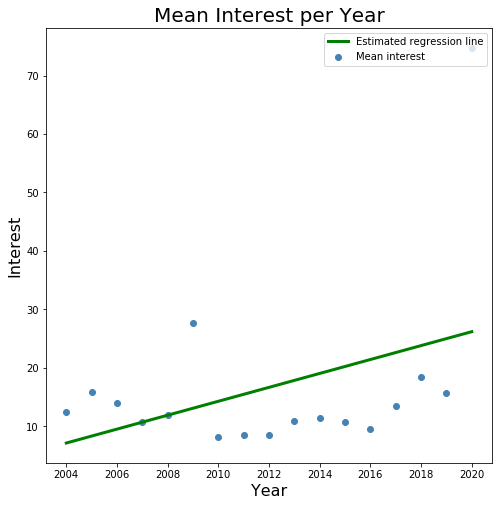

In [29]:
def OLS_model(x, y):
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    results = model.fit()
    print(results.summary())
    return results.params
x = OLS_model(dfNew['Year'], dfNew['Interest'])
print('--------------------------------------------')
print('Y = {} + Year * {}'.format(x.const, x.Year))
print('--------------------------------------------')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
axes.scatter(dfNew['Year'], dfNew['Interest'], color="steelblue", label="Mean interest")
axes.plot(dfNew['Year'], x.const + x.Year*dfNew['Year'], color="green", lw=3, label="Estimated regression line")
axes.set_xlabel("Year", fontsize=16)
axes.set_ylabel("Interest", fontsize=16)
axes.set_title('Mean Interest per Year', fontsize=20)
axes.legend(loc="upper right")

**Part F**: Give a physical interpretation of the coefficient $\hat{\beta}$, estimated from your model. Include addressing whether the relationship between time and interest in influenza is positive or negative. Fully justify your responses.

The $\hat{\beta}$ coefficient indicates that there is an estimated increase in the true regression line. This means that there has been an increase in average interest.

**Part G**: What interest in influenza does your simple linear regression model predict in the year 2050? What about in 2150? How about 1900? Feel free to use the statsmodels .predict() method here. What are potential drawbacks to this model for interest in influenza (think about the minimium and maximum values for the data)? 

**Note**: From Google Trends Documentation, the "interest" variable is defined as: "Interest represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term."

In [30]:
print('2050 prediction: {}'.format(x.const + (2050 * x.Year)))
print('2150 prediction: {}'.format(x.const + (2150 * x.Year)))
print('1900 prediction: {}'.format(x.const + (1900 * x.Year)))

2050 prediction: 61.90236928104741
2150 prediction: 180.91789215686777
1900 prediction: -116.62091503268266


Potential drawbacks for this model for interest in influenza is because this model uses the year as an index rather than a value. This means that the constant when added to the year times the year constant, you can get a value larger or smaller than Google's interest range.

**Part H:** Write a function that computes an 90% confidence interval for the slope parameter, $\beta$. You'll need to use this function again later. This function should take in the dataframe of yearly data and a statsmodel linear regression model, and print both the 90% confidence interval for beta and the value of $\hat{\beta}$. You should be performing all calculations yourself in Python. 

**RULES: There is a statsmodels function that computes the confidence interval. Do not use it, write python code yourself to calculate the CI. You may use the statsmodels confidence interval function to check your work if your like. You also may use the statsmodel .predict() method to get predicted values, and the .params attribute to get the slope parameter. Write your own code to calculate the sum of square errors. You may use numpy functions (min, max, mean, var, etc...) and stats functions (ppf/cdf/etc...) where appropriate.**

Call the function to calculate the 90% CI for beta with this model.

**Part I:** What proportion of the variation in mean annual interest in influenza is explained by your linear regression model? Note: It's fine to use the model .summary method here. You do not need to calculate this by hand.

**Part J:** Ouch, so that model doesn't really explain very much of the variance in the data! Maybe we have some outliers in our data. Use your original monthly dataframe and drop any rows that have an interest value greater than or equal to the 97th percentile of our data. Print the number of rows remaining.

**Part K:** In this problem, you'll use the functions you wrote in parts **D**, **E**, and **H** to process your new outlier free data, then fit a regression model and calculate the confidence interval on the slope parameter of the new model. First, use your function from part **D** to get the yearly averages. Second, use the function from part **E** to fit a linear regression model to the yearly averages. Finally, use the function you wrote in **H** to print the 90% confidence interval of the slope and the estimated slope.

**Part L:** Our estimate for beta, the slope parameter in part **K** should have come out to be slightly negative, and also should have had a confidence interval that included zero (check your work if it didn't). What does this tell us about our data? Does it seem like interest in Influenza is increasing or decreasing over time? Or is the interest in Influenza more affected by yearly trends and high peaks in intrest during especially bad years for flu (or flu like diseases)?